In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
!pip install openpyxl

In [6]:
data = pd.read_excel('data_wo_CommonSupport.xlsx')
data

,id,age,gym,pills,wage
0,1,22,0,1,7878
1,2,21,0,1,5218
2,3,19,0,1,4813
3,4,18,0,1,7530
4,5,50,1,0,9572
...,...,...,...,...,...
495,496,28,0,1,2543
496,497,46,1,0,5231
497,498,42,1,0,3696
498,499,44,1,0,7925


In [8]:
list_var = data.columns.to_list()
skim(data.filter(list_var))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 5      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ id              │   0 │      0 │   250.5 │    144.5 │      1 │   125.8 │  250.5 │  375.2 │   500 │ ▇▇▇▇▇▇  │  │
│ │ age             │   0 │      0 │    33.4 │    10.27 │     18 │      24 │     30 │     43 │    50 │ ▇▇▃▅▅▇  │  │
│ │ gym             │   0 │      0 │   0.488 │   0.5004 │      0 │       0 │      0 │      1 │     1 │ ▇    ▇  │  │
│ │ pills           │   0 │      0 │   0.512 │   0.5004 │      0 │       0 │      1 │      1 │     1 │ ▇    ▇  │  │
│ │ wage            │   0 │      0 │    6022 │     2365 │   2006 │    3921 │   5934 │   8203 │  9996 │ ▇▇▇▇▇▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴──────────┴────────┴─────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
data['gym'] = data['gym'].astype('category')
data['pills'] = data['pills'].astype('category')
data.dtypes

id          int64
age         int64
gym      category
pills    category
wage        int64
dtype: object

In [37]:
agg_data = data.melt(id_vars = 'pills', value_vars = ['age', 'gym'])
agg_data.groupby(['pills', 'variable'])['value'].agg(["mean", "std", "min", "max", "count"]).round(2)

mean   std  min  max  count
pills variable                              
0     age       42.99  4.65   35   50    244
      gym        1.00  0.00    1    1    244
1     age       24.25  3.71   18   30    256
      gym        0.00  0.00    0    0    256

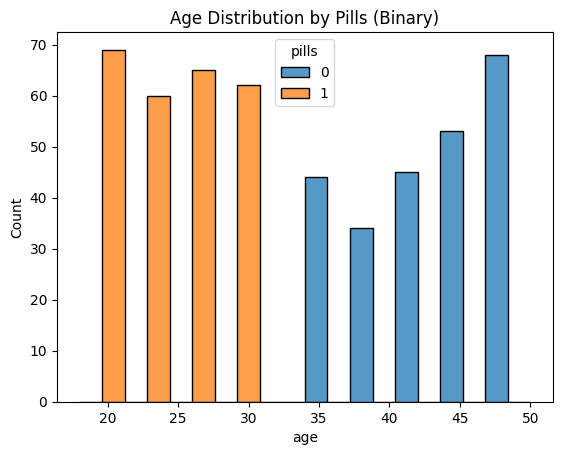

In [42]:
sns.histplot(data = data, x = "age", hue = "pills", multiple = "dodge", bins=10)
plt.title("Age Distribution by Pills (Binary)")
plt.show()

In [46]:
table_prop = pd.crosstab(data['pills'], data['gym'], normalize='all')
print(table_prop)

gym        0      1
pills              
0      0.000  0.488
1      0.512  0.000


In [47]:
reg = smf.ols(formula = 'wage ~ pills + age + gym', data = data).fit(cov_type = 'HC1')

In [52]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     1078.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          5.10e-217
Time:                        16:22:51   Log-Likelihood:                -4593.2
No. Observations:                 500   AIC:                             9192.
Df Residuals:                     497   BIC:                             9205.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3968.8339    568.199      6.985      0.000    2855.184    5082.484
pills[T.1]  1983.3616    122.718     16.162      0.000    1742.838    2223.885
gym[T.1]    1985.4722    523.929      3.790      0.000     958.591    3012.353
age            2.0739     25.071      0.083      0.934     -47.065      51.212
==============================================================================
Omnibus:                      391.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.447
Skew:                           0.007   Prob(JB):                     1.48e-07
Kurtosis:                       1.771   Cond. No.                     2.39e+16
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 1.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""